##How to choose algorithms for Microsoft Azure Machine Learning

By [Brandon Rohrer](https://github.com/brohrer)
Last updated: 09/28/2015

The answer to the question "What machine learning algorithm should I use?" is always "It depends." It depends on the size, quality, and nature of the data. It depends what you want to do with the answer. It depends on how the math of the algorithm was translated into instructions for the computer you are using. And it depends on how much time you have. Even the most experienced data scientists can't tell which algorithm will perform best before trying them.

## The Machine Learning Algorithm Cheat Sheet

The **Microsoft Azure Machine Learning Algorithm Cheat Sheet** helps you choose the right machine learning algorithm for your predictive analytics solutions from the Microsoft Azure Machine Learning library of algorithms.
This article walks you through how to use it.

> [AZURE.NOTE] To download the cheat sheet and follow along with this article, go to [Machine learning algorithm cheat sheet for Microsoft Azure Machine Learning Studio](machine-learning-algorithm-cheat-sheet.md).

This cheat sheet has a very specific audience in mind: a beginning data scientist with undergraduate-level machine learning, trying to choose an algorithm to start with in Azure Machine Learning Studio. That means that it makes some generalizations and oversimplifications, but it will point you in a safe direction. It also means that there are lots of algorithms not listed here. As Azure Machine Learning grows to encompass a more complete set of available methods, we'll add them.

These recommendations are compiled feedback and tips from a lot of data scientists and machine learning experts. We didn't agree on everything, but I've tried to harmonize our opinions into a rough consensus. Most of the statements of disagreement begin with "It depends..."

### How to use the cheat sheet

Read the path and algorithm labels on the chart as "For *&lt;path
label&gt;* use *&lt;algorithm&gt;*." For example, "For *speed* use *two
class logistic regression*." Sometimes more than one branch will apply.
Sometimes none of them will be a perfect fit. They're intended to be
rule-of-thumb recommendations, so don't worry about it being exact.
Several data scientists I talked with said that the only sure way to
find the very best algorithm is to try all of them.

Here's an example from the [Cortana Analytics Gallery](http://gallery.azureml.net/) of an experiment that tries
several algorithms against the same data and compares the results:
[Compare Multi-class Classifiers: Letter
recognition](http://gallery.azureml.net/Details/a635502fc98b402a890efe21cec65b92).

## Flavors of machine learning

### Supervised

Supervised learning algorithms make predictions based on a set of
examples. For instance, historical stock prices can be used to hazard
guesses at future prices. Each example used for training is labeled with
the value of interest&mdash;in this case the stock price. A supervised
learning algorithm looks for patterns in those value labels. It can use
any information that might be relevant&mdash;the day of the week, the season,
the company's financial data, the type of industry, the presence of
disruptive geopolicitical events&mdash;and each algorithm looks for different
types of patterns. After the algorithm has found the best pattern it
can, it uses that pattern to make predictions for unlabeled testing
data--tomorrow's prices.

This is a popular and useful type of machine learning. With one
exception, all of the modules in Azure Machine Learning are supervised learning
algorithms. There are several specific types of supervised learning that
are represented within Azure Machine Learning: classification, regression, and anomaly
detection.

* **Classification**. When the data is being used to predict a
category, supervised learning is also called classification. This is
the case when assigning an image as a picture of either a 'cat' or a
'dog'. When there are only two choices, this is called **two-class**
or **binomial classification**. When there are more categories, as
when predicting the winner of the NCAA March Madness tournament, this
problem is known as **multi-class classification**.

* **Regression**. When a value is being predicted, as with stock prices,
supervised learning is called regression.

* **Anomaly detection**. Sometimes the goal is to identify data points
that are simply unusual. In fraud detection, for example, any highly
unusual credit card spending patterns are suspect. The possible
variations are so numerous and the training examples so few, that it's
not feasible to learn what fraudulent activity looks like. The
approach that anomaly detection takes is to simply learn what normal
activity looks like (using a history non-fraudulent transactions) and
identify anything that is significantly different.

### Unsupervised

In unsupervised learning, data points have no labels associated with
them. Instead, the goal of an unsupervised learning algorithm is to
organize the data in some way or to describe its structure. This can
mean grouping it into clusters or finding different ways of looking at
complex data so that it appears simpler or more organized.

### Reinforcement learning

In reinforcement learning, the algorithm gets to choose an action in
response to each data point. The learning algorithm also receives a
reward signal a short time later, indicating how good the decision was.
Based on this, the algorithm modifies its strategy in order to achieve
the highest reward. Currently there are no reinforcement learning
algorithm modules in Azure Machine Learning. Reinforcement learning is common in
robotics, where the set of sensor readings at one point in time is a
data point, and the algorithm must choose the robot's next action. It is
also a natural fit for Internet of Things applications.

## Considerations when choosing an algorithm

### Accuracy

Getting the most accurate answer possible isn't always necessary.
Sometimes an approximation is adequate, depending on what you want to
use it for. If that's the case, you may be able to cut your processing
time dramatically by sticking with more approximate methods. Another
advantage of more approximate methods is that they naturally tend to
avoid [overfitting](https://youtu.be/DQWI1kvmwRg).

### Training time

The number of minutes or hours necessary to train a model varies a great
deal between algorithms. Training time is often closely tied to
accuracy&mdash;one typically accompanies the other. In addition, some
algorithms are more sensitive to the number of data points than others.
When time is limited it can drive the choice of algorithm, especially
when the data set is large.

### Linearity

Lots of machine learning algorithms make use of linearity. Linear
classification algorithms assume that classes can be separated by a
straight line (or its higher-dimensional analog). These include logistic
regression and support vector machines (as implemented in Azure Machine Learning).
Linear regression algorithms assume that data trends follow a straight
line. These assumptions aren't bad for some problems, but on others they
bring accuracy down.

The following code demonstrates a non-linear class boundary, where relying on a linear classification algorithm would result in low accuracy. Select the cell and use the run button to generate a graph of the data.

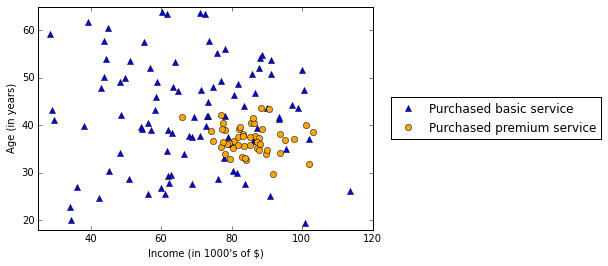

In [2]:
import numpy as np
import matplotlib.pyplot as plt

"""
Create two normally distributed age-income clusters, one for 
"purchased basic service" and one for "purchased premium service".
Each cluster has a different mean and standard deviation.
"""
# The number of points in each cluster.
N_1 = 100
N_2 = 50
# Age distributions for the two groups.
age_1 = np.random.normal(loc=42., scale=10., size=N_1)
age_2 = np.random.normal(loc=37., scale=3., size=N_2)
# Income distributions of the two groups.
income_1 = np.random.normal(loc=70., scale=20., size=N_1)
income_2 = np.random.normal(loc=85., scale=7., size=N_2)
# Set the figure instance.
ax = plt.figure(1)
# Plot points for income and age.
plt.plot(income_1, age_1, color='blue', marker='^', linewidth=0.)
plt.plot(income_2, age_2, color='orange', marker='o', linewidth=0.)
# Set limits on axes.
plt.xlim((25., 120.))
plt.ylim((18., 65.))
# Label axes.
plt.xlabel('Income (in 1000\'s of $)')
plt.ylabel('Age (in years)')
# Display legend.
plt.legend(['Purchased basic service', 'Purchased premium service'], 
           loc = 'center right', bbox_to_anchor = (1.7, 0.5), numpoints = 1)


The following pre-generated graph highlights the boundary between the groups:

![example graph with highlighted boundaries](https://larryfrstore.blob.core.windows.net/images/image1.png)

The following code demonstrates data with a nonlinear trend - using a linear regression method would generate much larger errors than necessary. Select the cell and use the run button to generate a graph of the data.

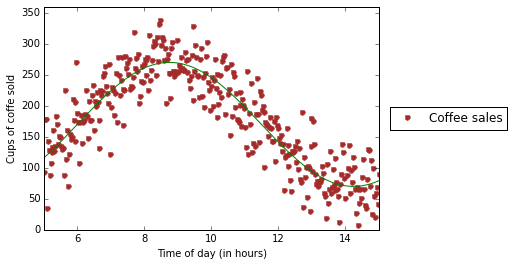

In [40]:
"""
Create data with a nonlinear (sinusoidal) trend illustrating 
coffee sales patterns over the course of a day.
"""
N = 350
scale = 100
# t is time in hours.
t_start = 5.
t_end = 15.
t = np.linspace(t_start, t_end, N)
# Create the sinusoid.
trend = (np.sin((t - 6.) * 2 * np.pi / 11.) + 1.7 ) * scale
# Add some random variation.
noise = np.random.normal(scale=scale/3, size=N)
cups = trend + noise

ax = plt.figure(2)
plt.plot(t, cups, color='brown', marker='.', markersize=10, linewidth=0.)
plt.plot(t, trend, color='green')
plt.xlim((t_start, t_end))
plt.ylim((0., scale * 3.6))
plt.xlabel('Time of day (in hours)')
plt.ylabel('Cups of coffe sold')
plt.legend(['Coffee sales'], 
           loc = 'center right', bbox_to_anchor = (1.4, 0.5), numpoints = 1)

The following pre-generated graph highlights the linear trend and actual trend:

![example graph with highlighted boundaries](https://larryfrstore.blob.core.windows.net/images/cupsofcoffee.png)

Despite their dangers, linear algorithms are very popular as a first line of attack. They tend to be algorithmically simple and fast to train.

### Number of parameters

Parameters are the knobs a data scientist gets to turn when setting up
an algorithm. They are numbers that affect the algorithm's behavior,
such as error tolerance or number of iterations, or options between
variants of how the algorithm behaves. The training time and accuracy of
the algorithm can sometimes be quite sensitive to getting just the right
settings. Typically, algorithms with large numbers parameters require
the most trial and error to find a good combination.

Alternatively, there is a [parameter
sweeping](machine-learning-algorithm-parameters-optimize.md)
module block in Azure Machine Learning that automatically tries all parameter
combinations at whatever granularity you choose. While this is a great
way to make sure you've spanned the parameter space, the time required
to train a model increases exponentially with the number of parameters.

The upside is that having many parameters typically indicates that an
algorithm has greater flexibility. It can often achieve very good
accuracy. Provided you can find the right combination of parameter
settings.

### Number of features

For certain types of data, the number of features can be very large
compared to the number of data points. This is often the case with
genetics or textual data. The large number of features can bog down some
learning algorithms, making training time unfeasibly long. Support
Vector Machines are particularly well suited to this case (see below).

### Special cases

Some learning algorithms make particular assumptions about the structure
of the data or the desired results. If you can find one that fits your
needs, it can give you more useful results, more accurate predictions,
or faster training times.

|**Algorithm**|**Accuracy**|**Training time**|**Linearity**|**Parameters**|**Notes**|
|---|:---:|:---:|:---:|:---:|---|
|**Two-class classification**| | | | | |
|[logistic regression](https://msdn.microsoft.com/library/azure/dn905994.aspx) | |&#9679;|&#9679;|5| |
|[decision forest](https://msdn.microsoft.com/library/azure/dn906008.aspx)|&#9679;| &#9675; | |6| |
|[decision jungle](https://msdn.microsoft.com/library/azure/dn905976.aspx)|&#9679;| &#9675; | |6|Low memory footprint|
|[boosted decision tree](https://msdn.microsoft.com/library/azure/dn906025.aspx)|&#9679;| &#9675; | |6|Large memory footprint|
|[neural network](https://msdn.microsoft.com/library/azure/dn905947.aspx)|&#9679;| | |9|[Additional customization is possible](http://go.microsoft.com/fwlink/?LinkId=402867)|
|[averaged perceptron](https://msdn.microsoft.com/library/azure/dn906036.aspx)| &#9675; | &#9675; |&#9679;|4| |
|[support vector machine](https://msdn.microsoft.com/library/azure/dn905835.aspx)| | &#9675; |&#9679;|5|Good for large feature sets|
|[locally deep support vector machine](https://msdn.microsoft.com/library/azure/dn913070.aspx)| &#9675; | | |8|Good for large feature sets|
|[Bayes' point machine](https://msdn.microsoft.com/library/azure/dn905930.aspx)| | &#9675; |&#9679;|3| |
|**Multi-class classification**| | | | | |
|[logistic regression](https://msdn.microsoft.com/en-us/library/azure/dn905853.aspx)| |&#9679;|&#9679;|5| |
|[decision forest](https://msdn.microsoft.com/library/azure/dn906015.aspx)|&#9679;| &#9675; | |6| |
|[decision jungle ](https://msdn.microsoft.com/library/azure/dn905963.aspx)|&#9679;| &#9675; | |6|Low memory footprint|
|[neural network](https://msdn.microsoft.com/library/azure/dn906030.aspx)|&#9679;| | |9|[Additional customization is possible](http://go.microsoft.com/fwlink/?LinkId=402867)|
|[one-v-all](https://msdn.microsoft.com/library/azure/dn905887.aspx)|-|-|-|-|See properties of the two-class method selected|
|**Regression**| | | | | |
|[linear ](https://msdn.microsoft.com/library/azure/dn905978.aspx)| |&#9679;|&#9679;|4| |
|[Bayesian linear](https://msdn.microsoft.com/library/azure/dn906022.aspx)| | &#9675; |&#9679;|2| |
|[decision forest](https://msdn.microsoft.com/library/azure/dn905862.aspx)|&#9679;| &#9675; | |6| |
|[boosted decision tree](https://msdn.microsoft.com/library/azure/dn905801.aspx)|&#9679;| &#9675; | |5|Large memory footprint|
|[fast forest quantile](https://msdn.microsoft.com/library/azure/dn913093.aspx)|&#9679;| &#9675; | |9|Distributions rather than point predictions|
|[neural network](https://msdn.microsoft.com/library/azure/dn905924.aspx)|&#9679;| | |9|[Additional customization is possible](http://go.microsoft.com/fwlink/?LinkId=402867)|
|[Poisson ](https://msdn.microsoft.com/library/azure/dn905988.aspx)| | |&#9679;|5|Technically log-linear. For predicting counts|
|[ordinal](https://msdn.microsoft.com/library/azure/dn906029.aspx)| | | |0|For predicting rank-ordering|
|**Anomaly detection**| | | | | |
|[support vector machine](https://msdn.microsoft.com/library/azure/dn913103.aspx)| &#9675; | &#9675; | |2|Especially good for large feature sets|
|[PCA-based anomaly detection ](https://msdn.microsoft.com/library/azure/dn913102.aspx)| | &#9675; |&#9679;|3| |
|[K-means](https://msdn.microsoft.com/library/azure/5049a09b-bd90-4c4e-9b46-7c87e3a36810/)| | &#9675; |&#9679;|4|A clustering algorithm|


**Algorithm properties:**

**&#9679;** - shows excellent accuracy, fast training times, and the use of linearity

** &#9675; ** - shows good accuracy and moderate training times


## Algorithm notes

### Linear regression

As mentioned previously, [linear regression](https://msdn.microsoft.com/library/azure/dn905978.aspx)
fits a line (or plane, or hyperplane) to the data set. It's a workhorse,
simple and fast, but it may be overly simplistic for some problems.
Check here for a [linear regression
tutorial](machine-learning-linear-regression-in-azure.md).

Select the next cell and then use run to see a graph of data with a linear trend.

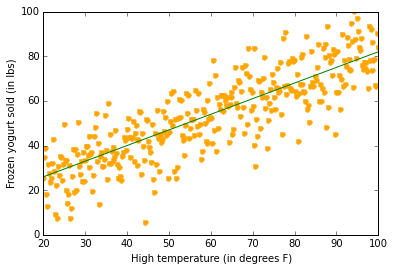

In [18]:
"""
Show some data with a linear trend.
Represent the amount of ice cream sold as a function of temperature.
"""
N = 350
scale = 32.
slope = .7
offset = 12.
# t is temperature in Fahrenheit.
t_start = 20.
t_end = 100.
t = np.linspace(t_start, t_end, N)
# Define the trend.
trend = t * slope + offset 
# Add random variation.
noise = np.random.normal(scale=scale/3, size=N)
lbs = trend + noise

ax = plt.figure(3)
plt.plot(t, lbs, color='orange', marker='.', markersize=10, linewidth=0.)
plt.plot(t, trend, color='green')
plt.xlim((t_start, t_end))
plt.ylim((0., 100.))
plt.xlabel('High temperature (in degrees F)')
plt.ylabel('Frozen yogurt sold (in lbs)')

### Logistic regression

Although it confusingly includes 'regression' in the name, logistic
regression is actually a powerful tool for
[two-class](https://msdn.microsoft.com/library/azure/dn905994.aspx)
and
[multiclass](https://msdn.microsoft.com/library/azure/dn905853.aspx)
classification. It's fast and simple. The fact that it uses an
'S'-shaped curve instead of a straight line makes it a natural fit for
dividing data into groups. Logistic regression gives linear class
boundaries, so when you use it, make sure a linear approximation is
something you can live with.

Select the next cell and use run to see a graph of a logistic regression to two-class data with just one feature - the
class boundary is the point at which the logistic curve is just as close to both classes.

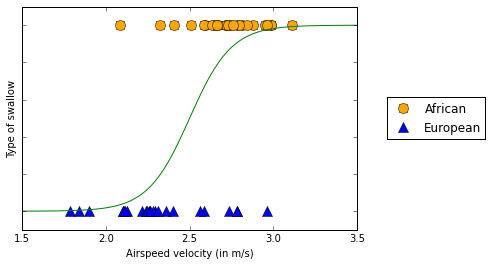

In [42]:
"""
Illustrate how logistic regression is used to perform two-class classification.
Separate African from European swallows based on their unladen airspeed velocity.
"""
N = 25
n_points = 100
scale = 8.
shift = 2.5
v_low = 1.5
v_hi = 3.5
v = np.linspace(v_low, v_hi, n_points)
# p is speed in meters per second.
p = (v - shift) * scale
# Define a logistic curve that approximately fits the data.
trend = 1. / (1. + np.exp(-p))
# Show individual data points for each bird.
af_mean = 2.8
eu_mean = 2.2
sigma = .25
african = np.random.normal(loc=af_mean, scale=sigma, size=N)
european = np.random.normal(loc=eu_mean, scale=sigma, size=N)

ax = plt.figure(4)
plt.plot(african, np.ones(african.size), color='orange', marker='o', 
         markersize=10, linewidth=0.)
plt.plot(european, np.zeros(european.size), color='blue', marker='^', 
         markersize=10, linewidth=0.)
plt.plot(v, trend, color='green')
plt.xlim((v_low, v_hi))
plt.ylim((-.1, 1.1))
plt.setp(plt.gca().get_yticklabels(), visible=False)
plt.xlabel('Airspeed velocity (in m/s)')
plt.ylabel('Type of swallow')
plt.legend(['African', 'European'], 
           loc = 'center right', bbox_to_anchor = (1.4, 0.5), numpoints = 1)

The following pre-generated graph highlights the boundary between the groups:

![example graph with highlighted boundaries](https://larryfrstore.blob.core.windows.net/images/typesofswallow.png)

### Trees, forests, and jungles

Decision forests
([regression](https://msdn.microsoft.com/library/azure/dn905862.aspx),
[two-class](https://msdn.microsoft.com/library/azure/dn906008.aspx),
and
[multiclass](https://msdn.microsoft.com/library/azure/dn906015.aspx)),
decision jungles
([two-class](https://msdn.microsoft.com/library/azure/dn905976.aspx)
and
[multiclass](https://msdn.microsoft.com/library/azure/dn905963.aspx)),
and boosted decision trees
([regression](https://msdn.microsoft.com/library/azure/dn905801.aspx)
and
[two-class](https://msdn.microsoft.com/library/azure/dn906025.aspx))
are all based on decision trees, a foundational machine learning
concept. There are many variants of decision trees, but they all do the
same thing&mdash;subdivide the feature space into regions with mostly the same
label. These can be regions of consistent category or of constant value,
depending on whether you are doing classification or regression.

Select the next cell and use run to graph a decision tree subdivides a feature space into regions of roughly
uniform values.

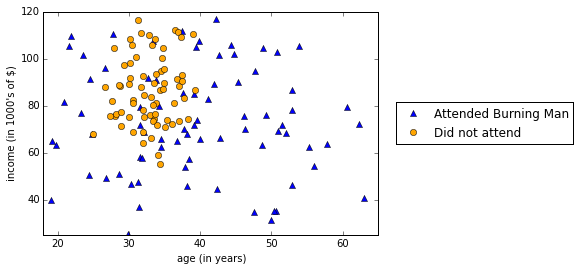

In [43]:
"""
Show how a decision tree can be used to separate out two classes
with a nonlinear decision boundary. Create two groups, one of 
Burning Man attendees, the other of non-attendees. Each as a
Normally distributed age-income cluster. The two clusters have
different centers and standard deviations.
"""
# The number of points in each group.
N_1 = 100
N_2 = 70
# The age distributions in each group.
age_1 = np.random.normal(loc=37., scale=14., size=N_1)
age_2 = np.random.normal(loc=32., scale=4., size=N_2)
# The income distributions in each group.
income_1 = np.random.normal(loc=70., scale=30., size=N_1)
income_2 = np.random.normal(loc=90., scale=15., size=N_2)

ax = plt.figure(5)
plt.plot(age_1, income_1, color='blue', marker='^', linewidth=0.)
plt.plot(age_2, income_2, color='orange', marker='o', linewidth=0.)
plt.ylim((25., 120.))
plt.xlim((18., 65.))
plt.ylabel('income (in 1000\'s of $)')
plt.xlabel('age (in years)')
plt.legend(['Attended Burning Man', 'Did not attend'], 
           loc = 'center right', bbox_to_anchor = (1.6, 0.5), numpoints = 1)

Since the boundaries may be unclear in the generated graph, the following image highlights the boundaries in a pre-generated graph:

![Image with boundaries highlighted](https://larryfrstore.blob.core.windows.net/images/image5.png)

The decisions used to produce the graph are as follows:

![Image of the decision tree used to produce the graph](http://larryfrstore.blob.core.windows.net/images/decisiontree.png)

Because a feature space can be subdivided into arbitrarily small
regions, it's easy to imagine dividing it finely enough to have one data
point per region&mdash;an extreme example of overfitting. In order to avoid
this, a large set of trees are constructed with special mathematical
care taken that the trees are not correlated. The average of this
"decision forest" is a tree that avoids overfitting. Decision forests
can use a lot of memory. Decision jungles are a variant that consumes
less memory at the expense of a slightly longer training time.

Boosted decision trees avoid overfitting by limiting how many times they
can subdivide and how few data points are allowed in each region. The
algorithm constructs a sequence of trees, each of which learns to
compensate for the error left by the tree before. The result is a very
accurate learner that tends to use a lot of memory. For the full
technical description, check out [Friedman's original
paper](http://www-stat.stanford.edu/~jhf/ftp/trebst.pdf).

[Fast forest quantile
regression](https://msdn.microsoft.com/library/azure/dn913093.aspx)
is a variation of decision trees for the special case where you want to
know not only the typical (median) value of the data within a region,
but also its distribution in the form of quantiles.

### Neural networks and perceptrons

Neural networks are brain-inspired learning algorithms covering
[multiclass](https://msdn.microsoft.com/library/azure/dn906030.aspx),
[two-class](https://msdn.microsoft.com/library/azure/dn905947.aspx),
and
[regression](https://msdn.microsoft.com/library/azure/dn905924.aspx)
problems. They come in an infinite variety, but the neural networks
within Azure Machine Learning are all of the form of directed acyclic graphs. That
means that input features are passed forward (never backward) through a
sequence of layers before being turned into outputs. In each layer,
inputs are weighted in various combinations, summed, and passed on to
the next layer. This combination of simple calculations results in the
ability to learn sophisticated class boundaries and data trends,
seemingly by magic. Many-layered networks of this sort perform the "deep
learning" that fuels so much tech reporting and science fiction.

This high performance doesn't come for free, though. Neural networks can
take a long time to train, particularly for large data sets with lots of
features. They also have more parameters than most algorithms, which
means that parameter sweeping expands the training time a great deal.
And for those overachievers who wish to [specify their own network
structure](http://go.microsoft.com/fwlink/?LinkId=402867), the
possibilities are inexhaustible.

Select the next cell and use run to display an example graph produced by a neural network.

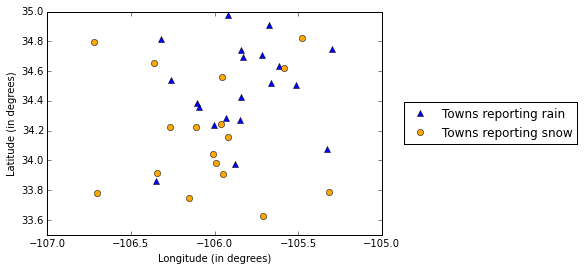

In [44]:
"""
Illustrate how a neural network can be used to find non-linear class
boundaries that are highly irregular. Plot the location of towns
and whether or not they reported receiving snow during a recent storm.
"""
# The number of towns in each group.
N_1 = 20
N_2 = 20
# The latitude and longitude of each town. Both groups are Normally distributed,
# but with different Normal distributions.
lon_1 = np.random.normal(loc=-106., scale=.5, size=N_1)
lon_2 = np.random.normal(loc=-105.8, scale=.3, size=N_2)
lat_1 = np.random.normal(loc=34., scale=.5, size=N_1)
lat_2 = np.random.normal(loc=34.5, scale=.3, size=N_2)

ax = plt.figure(6)
plt.plot(lon_2, lat_2, color='blue', marker='^', linewidth=0.)
plt.plot(lon_1, lat_1, color='orange', marker='o', linewidth=0.)
plt.ylim((33.5, 35.))
plt.xlim((-107., -105.))
plt.ylabel('Latitude (in degrees)')
plt.xlabel('Longitude (in degrees)')
plt.legend(['Towns reporting rain', 'Towns reporting snow'], 
           loc = 'center right', bbox_to_anchor = (1.6, 0.5), numpoints = 1)

The boundaries learned by neural networks can be complex and irregular. The following pre-generated graph highlights the boundary between the two groups:

![Boundary highlighted on a pre-generated graph](https://larryfrstore.blob.core.windows.net/images/image6.png)

The following diagram represents the logic used in a neural network:

![Image of neural network logic](http://larryfrstore.blob.core.windows.net/images/neuralnetwork.png)

The [two-class averaged
perceptron](https://msdn.microsoft.com/library/azure/dn906036.aspx)
is neural networks' answer to skyrocketing training times. It uses a
network structure that gives linear class boundaries. It is almost
primitive by today's standards, but it has a long history of working
robustly and is small enough to learn quickly.

### Support vector machines

Support vector machines (SVMs) find the boundary that separates classes
by as wide a margin as possible. When the two classes can't be clearly
separated, the algorithms find the best boundary they can. As written in
Azure Machine Learning, the [two-class
SVM](https://msdn.microsoft.com/library/azure/dn905835.aspx) does
this with a straight line only. (In SVM-speak, it uses a linear kernel.)
Because it makes this linear approximation, it is able to run fairly
quickly. Where it really shines is with feature-intense data, like text
or genomic. In these cases SVMs are able to separate classes more
quickly and with less overfitting than most other algorithms, in
addition to requiring only a modest amount of memory.

Select the next cell and use run to create a graph. This demonstrates how a typical support vector machine class boundary maximizes the margin
separating two classes.

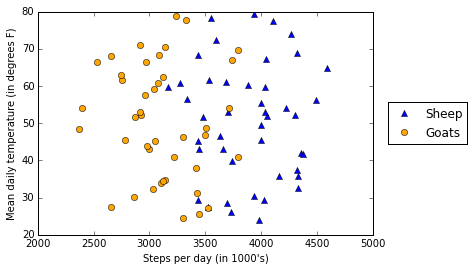

In [46]:
"""
Illustrate the separation of two separable classes using support vector machines.
In this case, the two classes are sheet and goats, separated based on how their
steps per day vary with temperature.
"""
# The number of animals in each group.
N_1 = 50
N_2 = 50
# The number of steps each group takes, Normally distributed.
steps_1 = np.random.normal(loc=3000., scale=400., size=N_1)
steps_2 = np.random.normal(loc=4000., scale=400., size=N_2)
# The temperatures at which each group was observed, Normally distributed.
temp_1 = np.random.normal(loc=50., scale=20., size=N_1)
temp_2 = np.random.normal(loc=50., scale=20., size=N_2)

ax = plt.figure(7)
plt.plot(steps_2, temp_2, color='blue', marker='^', linewidth=0.)
plt.plot(steps_1, temp_1, color='orange', marker='o', linewidth=0.)
plt.xlim((2000., 5000.))
plt.ylim((20., 80.))
plt.xlabel('Steps per day (in 1000\'s)')
plt.ylabel('Mean daily temperature (in degrees F)')
plt.legend(['Sheep', 'Goats'], 
           loc = 'center right', bbox_to_anchor = (1.3, 0.5), numpoints = 1)

The following pre-generated graph highlights the boundaries between the two groups:

![Image with a highlighted boundary](https://larryfrstore.blob.core.windows.net/images/image7.png)

Another product of Microsoft Research, the [two-class locally deep
SVM](https://msdn.microsoft.com/library/azure/dn913070.aspx) is a
non-linear variant of SVM that retains most of the speed and memory
efficiency of the linear version. It is ideal for cases where the linear
approach doesn't give accurate enough answers. The developers kept it
fast by breaking the problem down into a bunch of small linear SVM
problems. Read the [full
description](http://research.microsoft.com/um/people/manik/pubs/Jose13.pdf)
for the details on how they pulled off this trick.

Using a clever extension of nonlinear SVMs, the [one-class
SVM](https://msdn.microsoft.com/library/azure/dn913103.aspx) draws
a boundary that tightly outlines the entire data set. It is useful for
anomaly detection. Any new data points that fall far outside that
boundary are unusual enough to be noteworthy.

### Bayesian methods

Bayesian methods have a highly desirable quality: they avoid
overfitting. They do this by making some assumptions beforehand about
the likely distribution of the answer. Another byproduct of this
approach is that they have very few parameters. Azure Machine Learning has both
Bayesian algorithms for both classification ([Two-class Bayes' point
machine](https://msdn.microsoft.com/library/azure/dn905930.aspx))
and regression ([Bayesian linear
regression](https://msdn.microsoft.com/library/azure/dn906022.aspx)).
Note that these assume that the data can be split or fit with a straight
line.

On an historical note, Bayes' point machines were developed at Microsoft
Research. They have some exceptionally beautiful theoretical work behind
them. The interested student is directed to the [original article in
JMLR](http://jmlr.org/papers/volume1/herbrich01a/herbrich01a.pdf) and an
[insightful blog by Chris
Bishop](http://blogs.technet.com/b/machinelearning/archive/2014/10/30/embracing-uncertainty-probabilistic-inference.aspx).

### Specialized algorithms

If you have a very specific goal you may be in luck. Within the Azure Machine Learning
collection there are algorithms that specialize in rank prediction
([ordinal
regression](https://msdn.microsoft.com/library/azure/dn906029.aspx)),
count prediction ([Poisson
regression](https://msdn.microsoft.com/library/azure/dn905988.aspx)),
and anomaly detection (one based on [principal components
analysis](https://msdn.microsoft.com/library/azure/dn913102.aspx)
and one based on [support vector
machine](https://msdn.microsoft.com/library/azure/dn913103.aspx)s).
And there is a lone clustering algorithm as well
([K-means](https://msdn.microsoft.com/library/azure/5049a09b-bd90-4c4e-9b46-7c87e3a36810/)).

Select the next cell and use run to generate a graph demonstrating PCA-based anomaly detection. Note that the vast majority of the data falls
into a stereotypical distribution; points deviating dramatically from
that distribution are suspect.

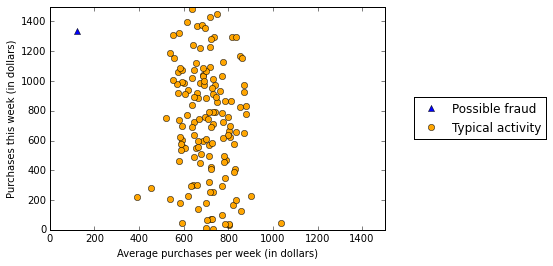

In [3]:
"""
Illustrate anomaly detection using Principal Components Analysis.
Compare the total purchases a customer makes in a given week to 
the total purchases they make in an average week. Typical activity falls
within a stereotypical ellipse. Anomalous activity falls far outside that ellipse.
"""
# The number of typical and anomolous purchases.
N_1 = 150
N_2 = 1
# The Normally distributed purchases for this week and for an average week.
this_week_1 = np.random.normal(loc=700., scale=400., size=N_1)
this_week_2 = np.random.normal(loc=1340., scale=4., size=N_2)
avg_1 = np.random.normal(loc=700., scale=100., size=N_1)
avg_2 = np.random.normal(loc=120., scale=4., size=N_2)

ax = plt.figure(8)
plt.plot(avg_2, this_week_2, color='blue', marker='^', linewidth=0.)
plt.plot(avg_1, this_week_1, color='orange', marker='o', linewidth=0.)
plt.xlim((0., 1500.))
plt.ylim((0., 1500.))
plt.xlabel('Average purchases per week (in dollars)')
plt.ylabel('Purchases this week (in dollars)')
plt.legend(['Possible fraud', 'Typical activity'], 
           loc = 'center right', bbox_to_anchor = (1.5, 0.5), numpoints = 1)

The following pre-generated graph highlights the boundary around typical activity data points:

![example graph with highlighted boundaries](https://larryfrstore.blob.core.windows.net/images/purchasesthisweek.png)

You can also group a data set into clusters using K-means. Select the next cell and use run to demonstrate clustering data.

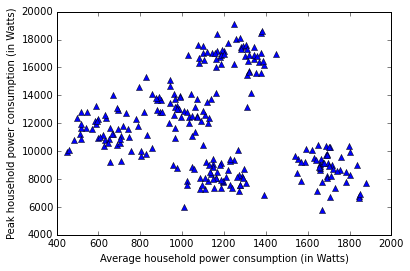

In [36]:
"""
Illustrate the use of k-means to identify clusters in unlabled data.
The data shows the relationship of average power consumption to peak power 
consumption. 
""" 
# The number of points in each cluster.
N_1 = 50
# The number of clusters.
N_2 = 5

ax = plt.figure(9)
for _ in range(N_2):
    # For each cluster, choose the center from a Normal distribution.
    avg_mean = np.random.normal(loc=1000., scale=300.)
    peak_mean = np.random.normal(loc=10000., scale=3000.)
    # Within each cluster, choose a Normally distributed set of points.
    avg_power = np.random.normal(loc=avg_mean, scale=100., size=N_1)
    peak_power = np.random.normal(loc=peak_mean, scale=1000., size=N_1)
    plt.plot(avg_power, peak_power, color='blue', marker='^', linewidth=0.)
#plt.xlim((0., 1500.))
#plt.ylim((0., 1500.))
plt.xlabel('Average household power consumption (in Watts)')
plt.ylabel('Peak household power consumption (in Watts)')

The following pre-generated graph highlights the boundary between the groups:

![Highlighted boundaries](https://larryfrstore.blob.core.windows.net/images/image9.png)

There is also an ensemble [one-v-all multiclass
classifier](https://msdn.microsoft.com/library/azure/dn905887.aspx),
which breaks the N-class classification problem into N-1 two-class
classification problems. The accuracy, training time, and linearity
properties are determined by the two-class classifiers used.

***A pair of two-class classifiers combine to form a three-class
classifier***

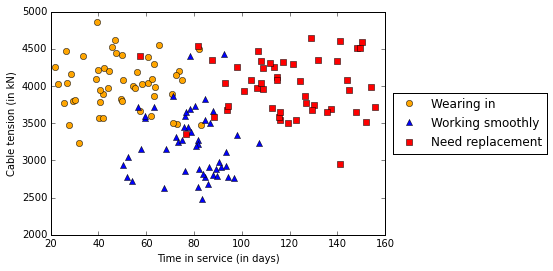

In [38]:
"""
Illustrate one-v-all, where a two-class classifier is used repeatedly to
perform multiclass classification. Separate out cables that are wearing in,
working smoothly, and need replacement based on a combination of 
time in service and cable tension.
"""
# The number of data points in each group.
N_1 = 50
N_2 = 50
N_3 = 50
# The tension for each group is Normally distributed with a different center.
tension_1 = np.random.normal(loc=4000., scale=400., size=N_1)
tension_2 = np.random.normal(loc=3200., scale=400., size=N_2)
tension_3 = np.random.normal(loc=4000., scale=400., size=N_3)
# The time in service for each group is Normally distributed with a different center.
days_1 = np.random.normal(loc=50., scale=15., size=N_1)
days_2 = np.random.normal(loc=80., scale=15., size=N_2)
days_3 = np.random.normal(loc=120., scale=25., size=N_3)

ax = plt.figure(10)
plt.plot(days_1, tension_1, color='orange', marker='o', linewidth=0.)
plt.plot(days_2, tension_2, color='blue', marker='^', linewidth=0.)
plt.plot(days_3, tension_3, color='red', marker='s', linewidth=0.)
plt.xlabel('Time in service (in days)')
plt.ylabel('Cable tension (in kN)')
plt.legend(['Wearing in', 'Working smoothly', 'Need replacement'], 
           loc = 'center right', bbox_to_anchor = (1.5, 0.5), numpoints = 1)

The following pre-generated graph highlights the boundaries between groups:

![Highlighted boundaries](https://larryfrstore.blob.core.windows.net/images/image10.png)

Azure Machine Learning also includes access to a powerful machine learning framework
under the title of [Vowpal
Wabbit](https://msdn.microsoft.com/library/azure/8383eb49-c0a3-45db-95c8-eb56a1fef5bf).
VW defies categorization here, since it can learn both classification
and regression problems and can even learn from partially unlabeled
data. You can configure it to use any one of a number of learning
algorithms, loss functions, and optimization algorithms. It was designed
from the ground up to be efficient, parallel, and extremely fast. It
handles ridiculously large feature sets with little apparent effort.
Started and led by Microsoft Research's own John Langford, VW is a
Formula One entry in a field of stock car algorithms. Not every problem
fits VW, but if yours does, it may be worth your while to climb the
learning curve on its interface. It's also available as [stand-alone
open source code](https://github.com/JohnLangford/vowpal_wabbit) in
several languages.